# Classifier Trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

## Data preprocessing

### Data Collection

In [2]:
df = pd.read_csv('data/credit_score.csv')

In [3]:
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [4]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


### Data Cleansing

#### Define target

In [5]:
target = 'Credit Score'

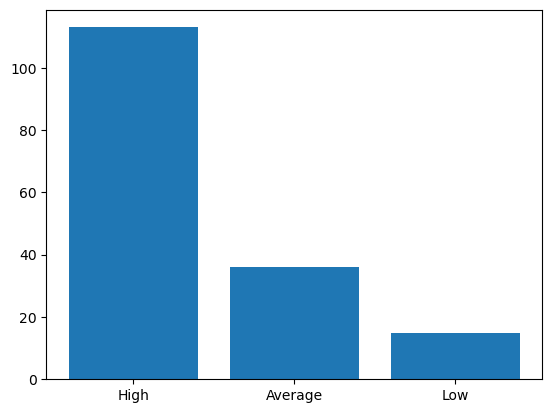

In [6]:
target_count = df[target].value_counts()
plt.bar(target_count.index.astype(str), target_count.values)
plt.show()

In [7]:
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

#### Check data type

In [8]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score           int64
dtype: object

#### Clean missing value

In [9]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

#### Transform categorical columns

In [10]:
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])

marital_encoder = LabelEncoder()
df['Marital Status'] = marital_encoder.fit_transform(df['Marital Status'])

home_encoder = LabelEncoder()
df['Home Ownership'] = home_encoder.fit_transform(df['Home Ownership'])

education_encoder = LabelEncoder()
df['Education'] = education_encoder.fit_transform(df['Education'])

In [11]:
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,1
1,30,1,100000,4,0,2,0,1
2,35,0,75000,2,0,1,0,1
3,40,1,125000,3,1,0,0,1
4,45,0,100000,1,0,3,0,1
...,...,...,...,...,...,...,...,...
159,29,0,27500,3,1,0,1,2
160,34,1,47500,0,1,0,1,0
161,39,0,62500,1,0,2,0,1
162,44,1,87500,4,1,0,0,1


#### Assign target and features

In [12]:
features = [x for x in df.columns if x != target]

In [13]:
features

['Age',
 'Gender',
 'Income',
 'Education',
 'Marital Status',
 'Number of Children',
 'Home Ownership']

In [14]:
y = df[target]
X = df[features]

In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
159    2
160    0
161    1
162    1
163    1
Name: Credit Score, Length: 164, dtype: int64

In [16]:
X

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,0,50000,1,1,0,1
1,30,1,100000,4,0,2,0
2,35,0,75000,2,0,1,0
3,40,1,125000,3,1,0,0
4,45,0,100000,1,0,3,0
...,...,...,...,...,...,...,...
159,29,0,27500,3,1,0,1
160,34,1,47500,0,1,0,1
161,39,0,62500,1,0,2,0
162,44,1,87500,4,1,0,0


### Split dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
97,45,0,115000,1,0,3,0
11,51,1,135000,1,0,0,0
65,45,0,110000,1,0,3,0
86,34,1,47500,0,1,0,1
6,26,0,40000,0,1,0,1
...,...,...,...,...,...,...,...
71,46,0,97500,3,0,1,0
106,32,1,57500,0,1,0,1
14,37,0,70000,1,0,2,0
92,35,0,85000,2,0,1,0


In [19]:
y_train

97     1
11     1
65     1
86     0
6      0
      ..
71     1
106    0
14     1
92     1
102    1
Name: Credit Score, Length: 114, dtype: int64

### Feature selection

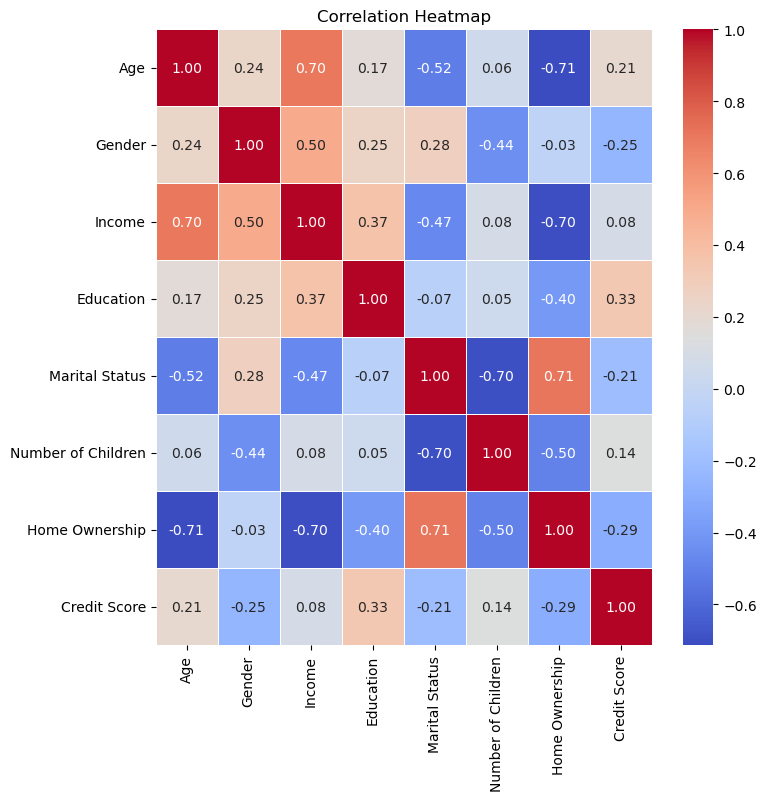

In [20]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Model

In [21]:
def get_feature_importances(model, X):
    """
    Get a feature importance dataFrame from best parameters.
    """
    importances = model.best_estimator_.feature_importances_

    importances_df = pd.DataFrame({
        'features': X.columns,
        'importances': importances
    })

    importances_df = importances_df.sort_values(by='importances', ascending=False)
    importances_df = importances_df.reset_index(drop=True)

    return importances_df

In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Decision Tree

In [23]:
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [24]:
dt = DecisionTreeClassifier(random_state=42)
dt_model = GridSearchCV(estimator=dt, param_grid=dt_param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
dt_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
get_feature_importances(dt_model, X_train)

,features,importances
0,Home Ownership,0.726139
1,Income,0.273861
2,Age,0.000000
3,Gender,0.000000
4,Education,0.000000
5,Marital Status,0.000000
6,Number of Children,0.000000


### Random Forest

In [26]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
rf = RandomForestClassifier(random_state=42)
rf_model = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
rf_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [28]:
get_feature_importances(rf_model, X_train)

,features,importances
0,Home Ownership,0.387047
1,Income,0.257382
2,Age,0.202817
3,Education,0.055890
4,Number of Children,0.038730
5,Marital Status,0.030770
6,Gender,0.027364


### XGBoost

In [29]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [30]:
xgb = xgb.XGBClassifier(objective='multi:softmax', random_state=42)
xgb_model = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
xgb_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     int...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [31]:
get_feature_importances(xgb_model, X_train)

,features,importances
0,Home Ownership,0.827847
1,Income,0.167871
2,Age,0.004281
3,Gender,0.000000
4,Education,0.000000
5,Marital Status,0.000000
6,Number of Children,0.000000


## Evaluate

### Decision Tree

In [32]:
y_pred_train = dt_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.99      0.99        81
           2       1.00      1.00      1.00         8

    accuracy                           0.99       114
   macro avg       0.99      1.00      0.99       114
weighted avg       0.99      0.99      0.99       114



In [33]:
y_pred_test = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.94      0.97      0.95        32
           2       1.00      1.00      1.00         7

    accuracy                           0.94        50
   macro avg       0.95      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50



### Random Forest

In [34]:
y_pred_train = rf_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.98      0.99        81
           2       1.00      1.00      1.00         8

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [35]:
y_pred_test = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.94      0.94      0.94        32
           2       1.00      1.00      1.00         7

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



### XGBoost

In [36]:
y_pred_train = xgb_model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.98      0.99        81
           2       1.00      1.00      1.00         8

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [37]:
y_pred_test = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.94      0.94      0.94        32
           2       1.00      1.00      1.00         7

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



## Test run

In [38]:
def predict(model, input_df, target_encoder):
    """
    Predict result with label decoding.
    """
    result = model.best_estimator_.predict(input_df)
    result_decoded = target_encoder.inverse_transform(result)

    return result_decoded

In [39]:
input = {
    'Age': 25,
    'Gender': 'Female',
    'Income': 55000,
    'Education': "Bachelor's Degree",
    'Marital Status': 'Single',
    'Number of Children': 0,
    'Home Ownership': 'Rented'
}

In [40]:
input_df = pd.DataFrame(input, index=[0])

In [41]:
input_df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,Female,55000,Bachelor's Degree,Single,0,Rented


In [42]:
input_df['Gender'] = gender_encoder.transform(input_df['Gender'])
input_df['Education'] = education_encoder.transform(input_df['Education'])
input_df['Marital Status'] = marital_encoder.transform(input_df['Marital Status'])
input_df['Home Ownership'] = home_encoder.transform(input_df['Home Ownership'])

In [43]:
input_df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,0,55000,1,1,0,1


In [44]:
predict(dt_model, input_df, target_encoder)

array(['Average'], dtype=object)

In [45]:
predict(rf_model, input_df, target_encoder)

array(['Average'], dtype=object)

In [46]:
predict(xgb_model, input_df, target_encoder)

array(['Average'], dtype=object)